In [0]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [0]:
#without ProviderID and VendorID
X_train = pd.read_csv('drive/My Drive/Colab Notebooks/Data/train_data_hhp1.csv')
X_test = pd.read_csv('drive/My Drive/Colab Notebooks/Data/test_data_hhp1.csv')

Y_train = X_train['DaysInHospital']
Y_test = X_test['DaysInHospital']

X_train.drop(['DaysInHospital', 'Year', 'ClaimsTruncated', 'MemberID'], axis=1, inplace=True)
X_test.drop(['DaysInHospital', 'Year', 'ClaimsTruncated', 'MemberID'], axis=1, inplace=True)

In [0]:
def rmsle_metric(y_actual, y_predicted):
    y_actual_log = np.log(y_actual + 1)
    y_predicted_log = np.log(y_predicted + 1)
    rms = sqrt(mean_squared_error(y_actual_log, y_predicted_log))
    return rms

def rmse(logY_pred, logY_act):
    rms = sqrt(mean_squared_error(logY_pred, logY_act))
    return rms

In [0]:
log_Y_train = np.log(Y_train+1)
log_Y_test = np.log(Y_test+1)

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(15, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),
        layers.Dense(10, activation=tf.nn.relu),
        layers.Dense(5, activation=tf.nn.relu),
        layers.Dense(1)
    ])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [0]:
model = build_model()

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 15)                2055      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 6         
Total params: 2,276
Trainable params: 2,276
Non-trainable params: 0
_________________________________________________________________



....................................................................................................

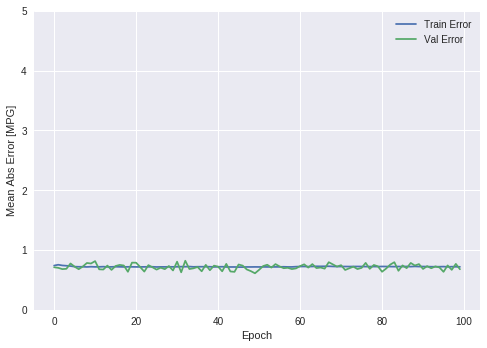

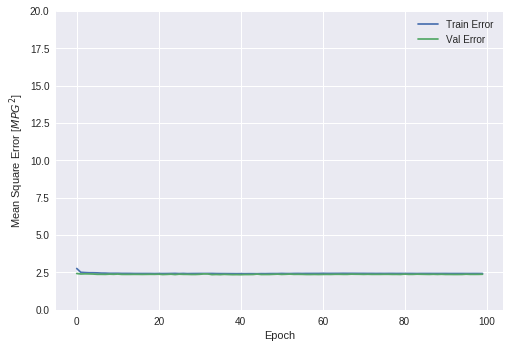

In [60]:
model = build_model()
EPOCHS = 100
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(X_train, log_Y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0)

In [0]:
logY_pred_train = model.predict(X_train).flatten()
logY_pred_test = model.predict(X_test).flatten()

In [0]:
#truncated
logY_pred_test[logY_pred_test < 0] = 0
logY_pred_train[logY_pred_train < 0] = 0
Y_pred_train = np.exp(logY_pred_train) - 1
Y_pred_test = np.exp(logY_pred_test) - 1

In [74]:
min(Y_pred_test)

0.0

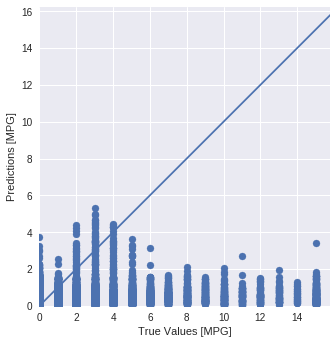

In [75]:
plt.scatter(Y_test, Y_pred_test)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [76]:
print('RSME on traing set',rmse(log_Y_train, logY_pred_train),
      'RSME on testing set',rmse(log_Y_test, logY_pred_test)
     )

RSME on traing set 0.4600370976849972 RSME on testing set 0.4524685660379211
